In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r'C:\Users\user\Latihan1\heart.csv')

In [6]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
S=df['slope']
T=df['target']

In [8]:
S2=np.array(S).reshape(-1,1)
T2=np.array(T).reshape(-1,1)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model_tebak_sakit = LogisticRegression().fit(S2,T2)
model_tebak_sakit

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [10]:
tebak_sakit_prediksi = model_tebak_sakit.predict(S2)

In [11]:
tebak_sakit_prediksi

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
tebak_sakit_prediksi_prob = model_tebak_sakit.predict_proba(S2)
tebak_sakit_prediksi_prob

array([[0.31157918, 0.68842082],
       [0.83671926, 0.16328074],
       [0.83671926, 0.16328074],
       ...,
       [0.60363528, 0.39636472],
       [0.31157918, 0.68842082],
       [0.60363528, 0.39636472]])

In [13]:
performance_model_tebak_sakit = model_tebak_sakit.score(S2,T2)
print('performance model tebak sakit:',performance_model_tebak_sakit)
cof_model_tebak_sakit = model_tebak_sakit.coef_
constant_model_tebak_sakit = model_tebak_sakit.intercept_
print('coefficient dari model tebak sakit:',cof_model_tebak_sakit)
print('konstan model tebak sakit:',constant_model_tebak_sakit)

performance model tebak sakit: 0.6926829268292682
coefficient dari model tebak sakit: [[1.21338217]]
konstan model tebak sakit: [-1.63401754]


In [14]:
confusion_matrix(T2,tebak_sakit_prediksi)

array([[370, 129],
       [186, 340]], dtype=int64)

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [16]:
hasil_confusion_matrik_sakit = confusion_matrix(T2,tebak_sakit_prediksi)

In [17]:
hasil_confusion_matrik_sakit 

array([[370, 129],
       [186, 340]], dtype=int64)

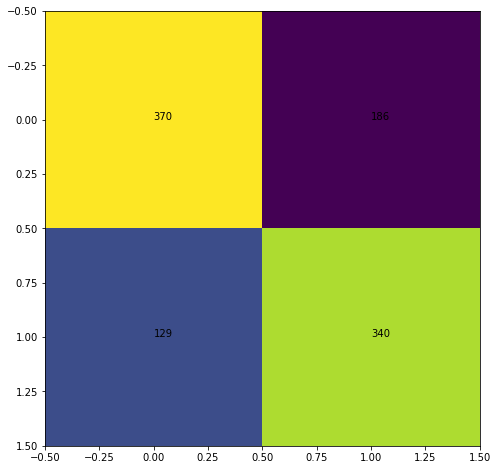

In [18]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(hasil_confusion_matrik_sakit)
ax.grid(False)
for i in range(2):
    for j in range(2):
        ax.text(j,i,hasil_confusion_matrik_sakit[j,i])
plt.show()

In [47]:
type(hasil_confusion_matrik_sakit )

numpy.ndarray